# 專案目的
分類蘑菇是可食用 還是不可食用  
class = 0(可食用)，1(有毒的)

# 1.資料前處理
 1-1.讀取資料  
 1-2.label encoding   
 1-3.定義XY 拆分訓練集 測試集  
 

### 1-1. 讀取資料

#### 欄位資料描述
- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d 

In [1]:
import pandas as pd
dataset = pd.read_csv('mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
len(dataset.columns)

23

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### 1-2.label encoding 

In [2]:
from sklearn.preprocessing import LabelEncoder

# 給予一個新的dataframe專門給label encoding後的
df = pd.DataFrame()

# 初始化LabelEncoder
label_encoder = LabelEncoder()


# 對每個欄位進行標籤編碼，並賦值給新的dataframe
for column in dataset.columns:
    df[column] = label_encoder.fit_transform(dataset[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 1-3.定義標籤X Y
1. 定義特徵 X與Y
2. 做training & testing 的切分

In [3]:
X = df.iloc[:, 1:23].values
y = df.iloc[:,0].values.reshape(-1,1)

In [4]:
# 分割訓練和測試 在把剛剛的X y切成訓練跟測試
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)


print(f"訓練集大小 X:{X_train.shape},y:{y_train.shape}")
print(f"測試集大小 X:{X_test.shape},y:{y_test.shape}")

訓練集大小 X:(6499, 22),y:(6499, 1)
測試集大小 X:(1625, 22),y:(1625, 1)


# 2.EDA資料探索性分析 (敘述性統計)
- 2-0. 資料檢查 
- 2-1. 多變量圖 
- 2-2. 熱力圖

##### <font color=#FFFF00>結論 : X特徵之間關連性越低越好，與y欄位"class"關聯性越高越好</font>

### 2-0. 資料檢查

In [10]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [12]:
df.describe() 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


#### 基本上我的資料是類別型資料 .describe並沒有幫助

### 2-1. 多變量圖 
查看X特徵欄位之間與Y預測欄位之間的關係  

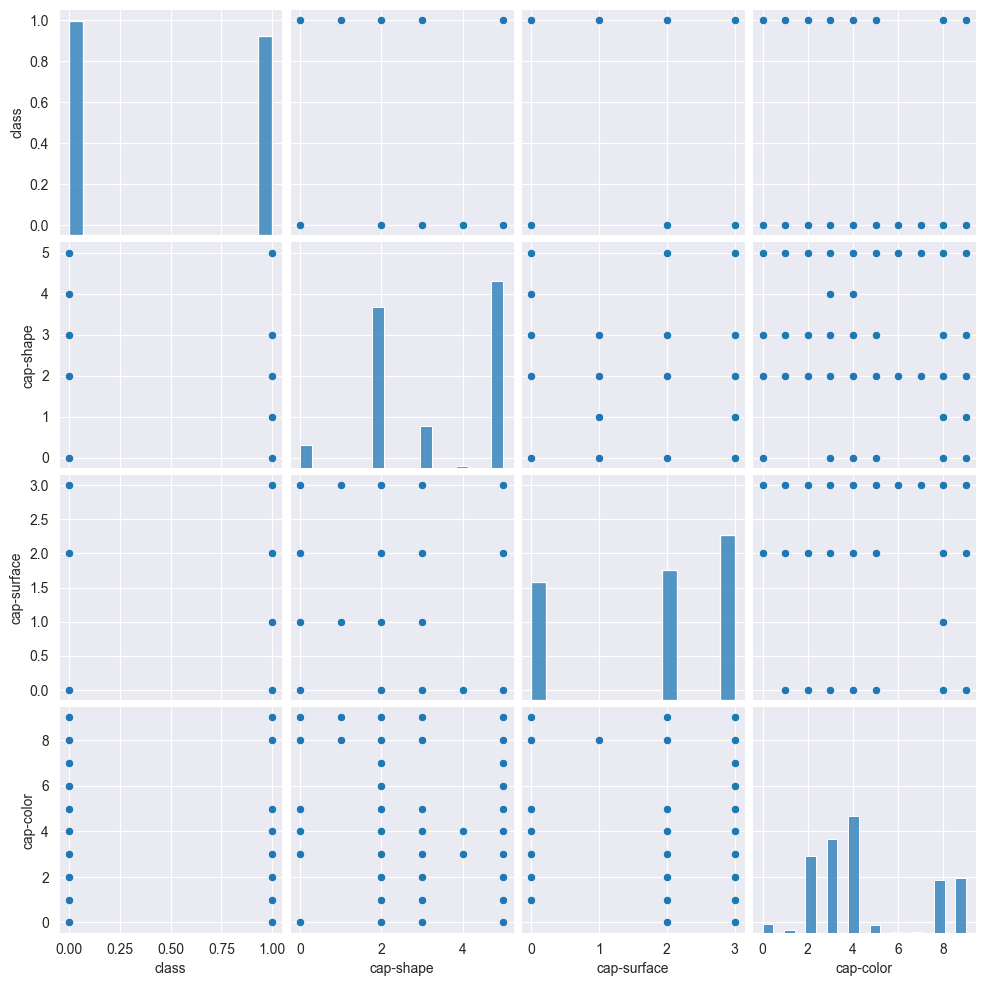

In [13]:
import seaborn as sns
sns.set_style('darkgrid')

sns.pairplot(df[['class','cap-shape','cap-surface','cap-color']])


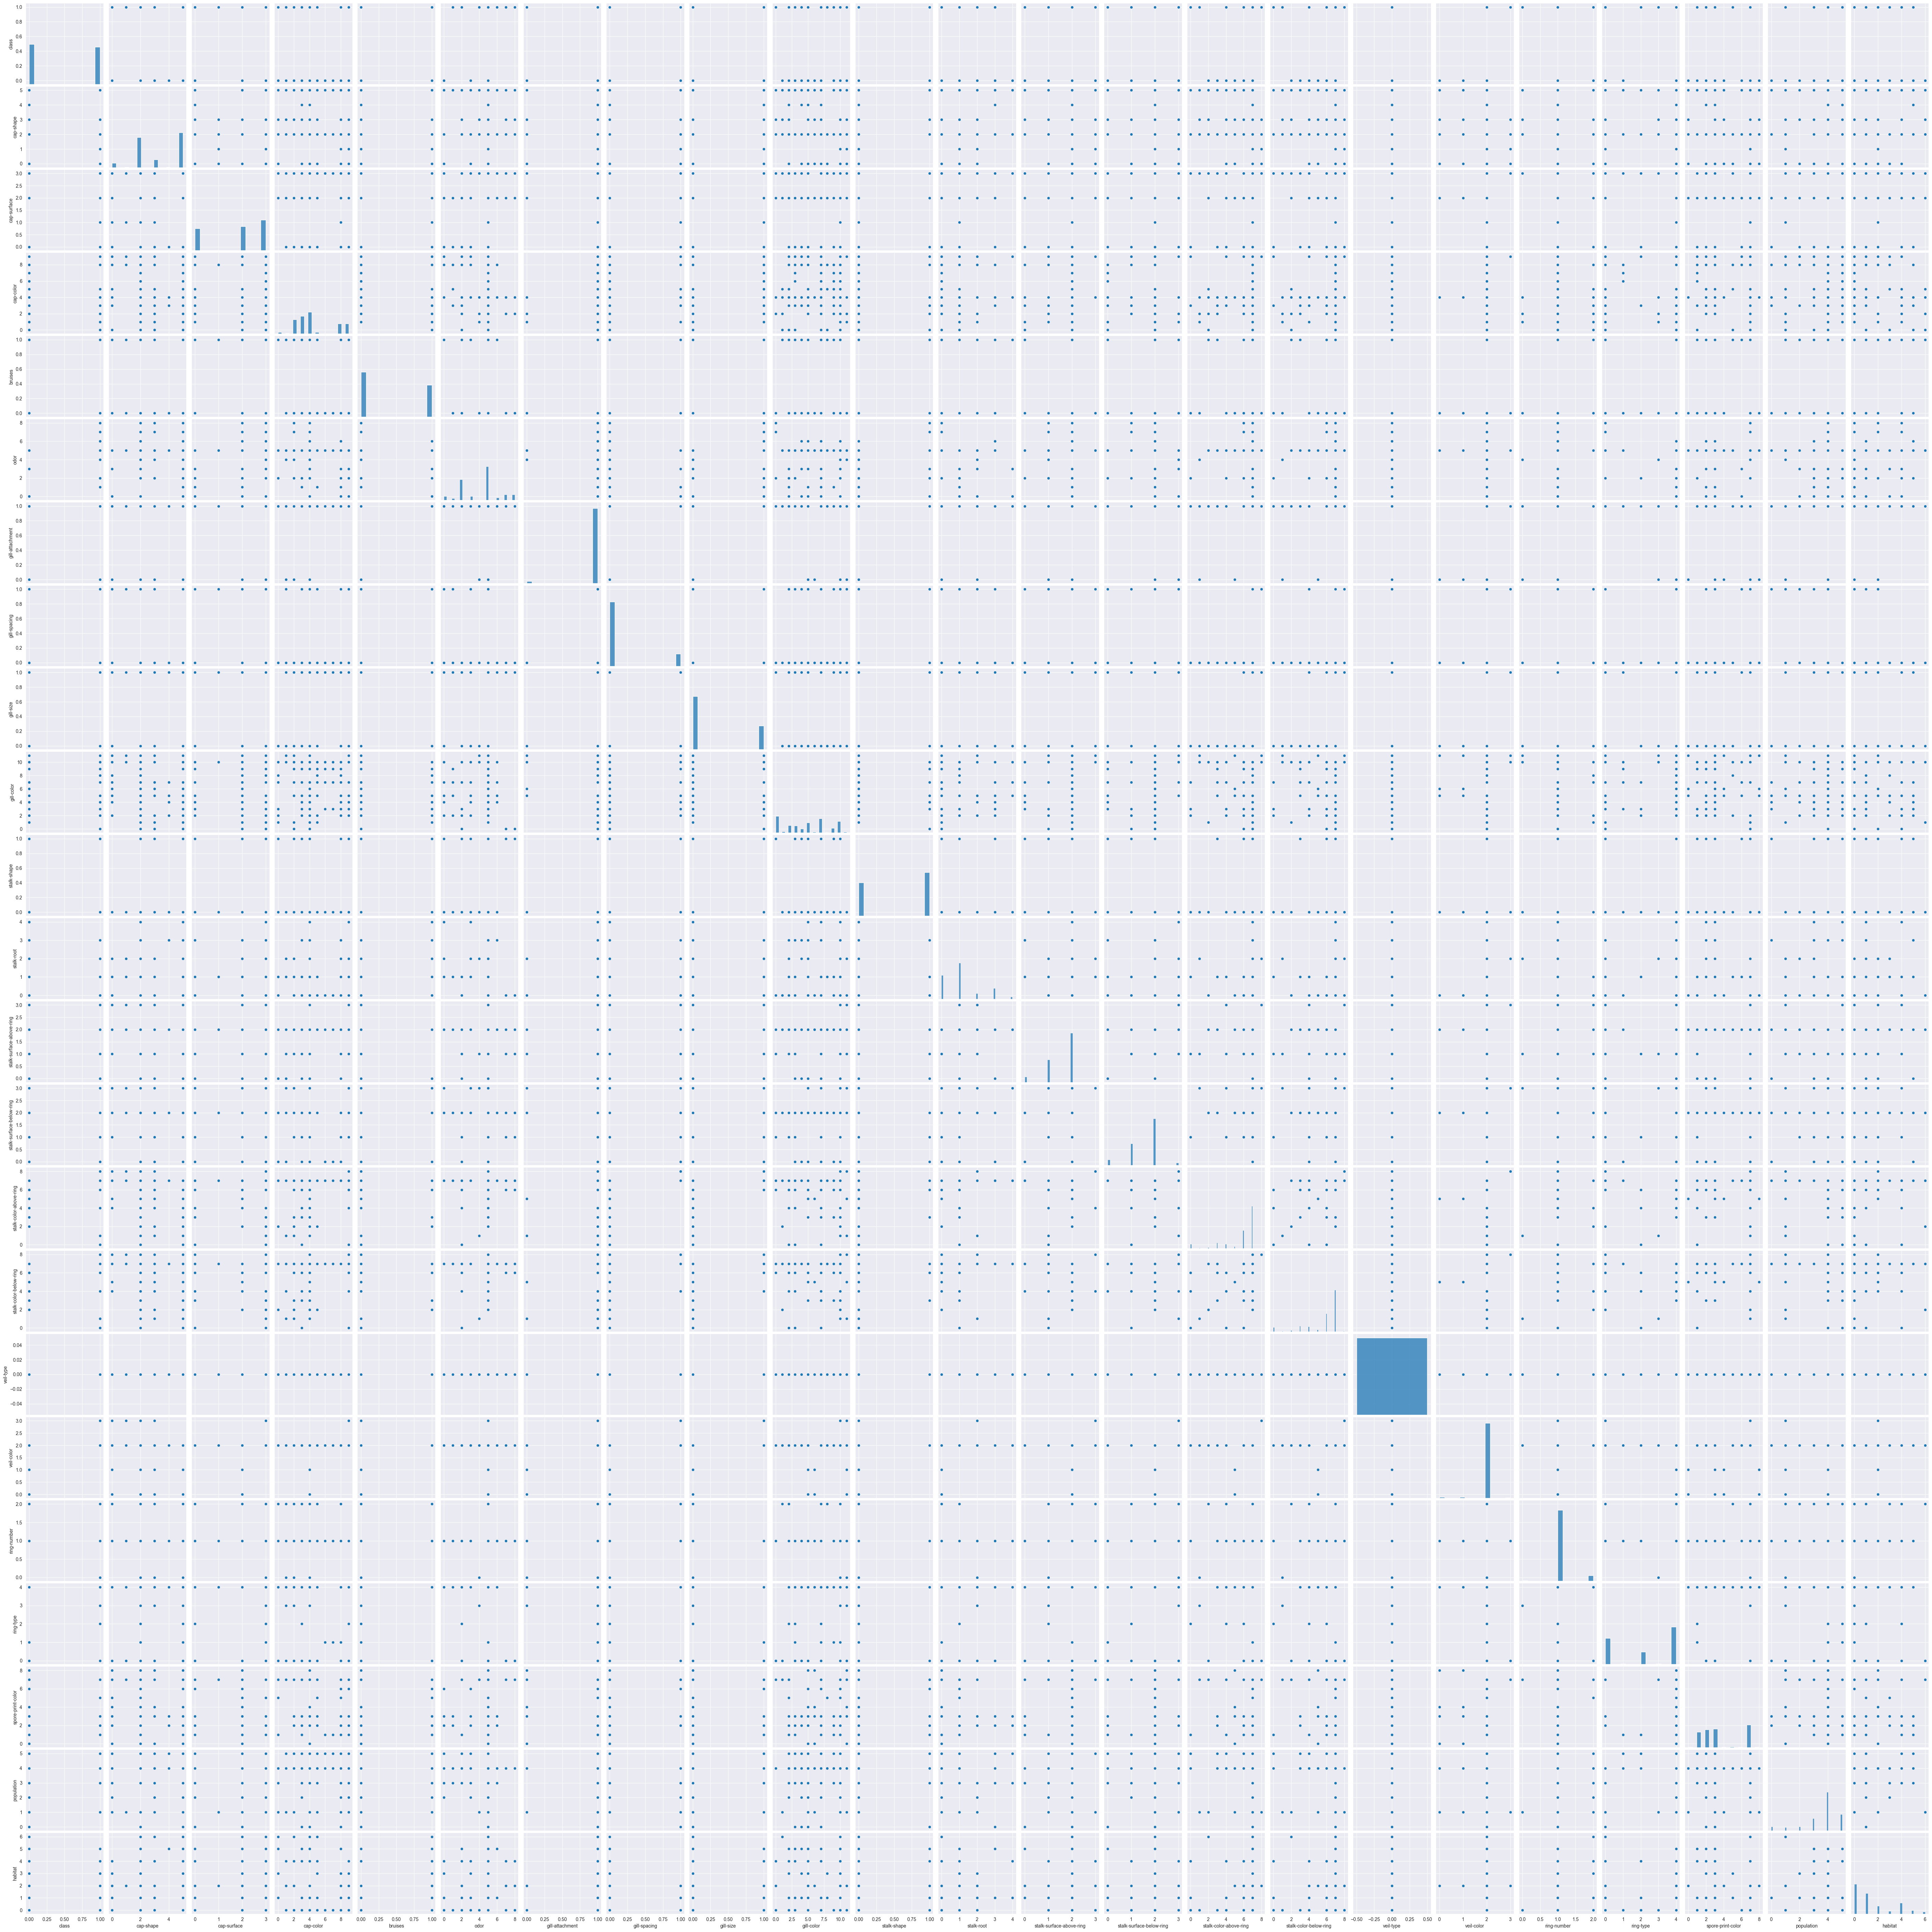

In [14]:
import seaborn as sns
sns.set_style('darkgrid')

sns.pairplot(df[['class','cap-shape','cap-surface','cap-color','bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']])

### 2-2. 熱力圖
檢查變數之間是否有共線性，共線性高代表資料特徵重複度高。
對Y預測的效益就不大，代表可以只留下單個貢獻性的特徵X即可

<Axes: >

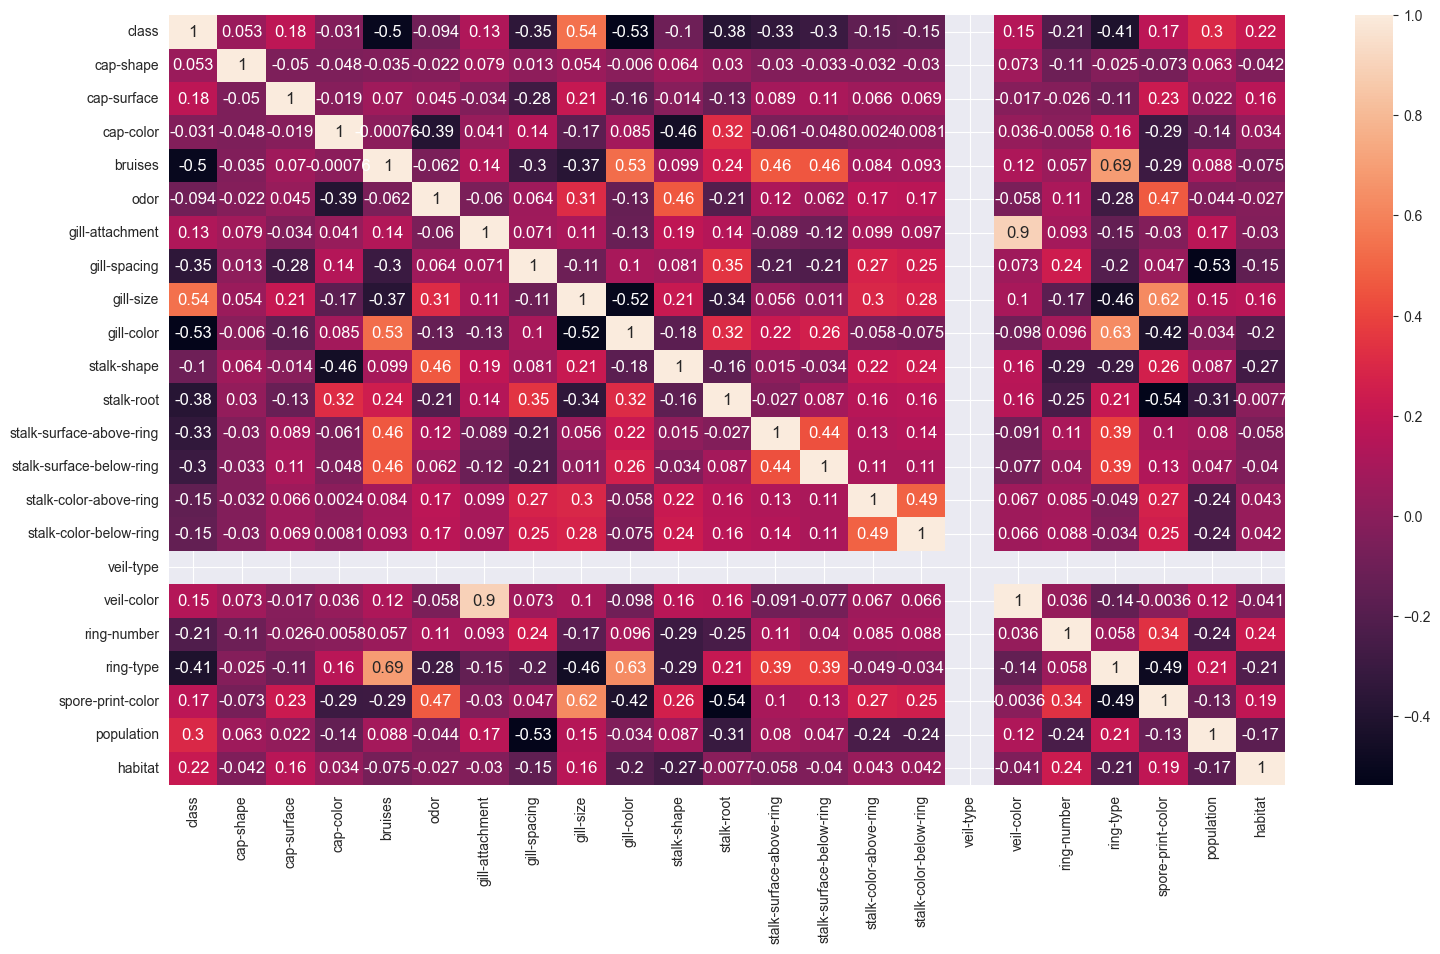

In [15]:
import matplotlib.pyplot as plt
corrmat = df.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

# 3.Modeling

- random forest  
3-1. 用模型去對變數(特徵)做重要性排名  
3-2. 印出四個指標- 用訓練集去做訓練 用測試集做測試(目前結果分數都為1不尋常有待解決)

- SVM  
3-3. SVM去做2元分類  
3-3-1. 實際預測  
3-4. SVM 對特徵做手動篩選，看準確率會不會上升

- 高斯貝式分類器  
3-5. 套膜  
3-6. 模糊矩陣&與四大指標

## Random forest


### 3-1.敘述性統計沒有概念的話
實務上來說，對數據不一定的了解  
<font color=#FFFF00>結論 : 因此使用模型對於特徵做的排序</font>  
<font color=#FFFF00>此處以random forest 做範例</font>


In [12]:
from sklearn.ensemble import RandomForestClassifier


X_train = pd.DataFrame(X_train, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']) 
# 初始化 RandomForestClassifier
model = RandomForestClassifier()
# 模型對於數據的擬合
model.fit(X_train, y_train)
# 获取特征重要性
feature_importances = model.feature_importances_


# 创建一个包含特征名和对应重要性的 DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 按重要性降序排序
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# 打印排序后的特征
print(sorted_features)

c:\Users\Wilson\anaconda3\envs\machine_learning_final2\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                     Feature  Importance
4                       odor    0.171717
8                 gill-color    0.119435
7                  gill-size    0.107754
18                 ring-type    0.094187
19         spore-print-color    0.090233
11  stalk-surface-above-ring    0.062190
20                population    0.056585
10                stalk-root    0.052219
12  stalk-surface-below-ring    0.038090
3                    bruises    0.036886
6               gill-spacing    0.035543
21                   habitat    0.031624
14    stalk-color-below-ring    0.024087
9                stalk-shape    0.023866
2                  cap-color    0.014699
17               ring-number    0.012641
13    stalk-color-above-ring    0.012169
1                cap-surface    0.007503
0                  cap-shape    0.004714
16                veil-color    0.002202
5            gill-attachment    0.001653
15                 veil-type    0.000000


### 3-2. 印出四個指標

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn import metrics
# Make predictions
y_test_pred_rf = model.predict(X_test)
print(f"accutacy score : {metrics.accuracy_score(y_test, y_test_pred_rf)}")
print(f"f1_score : {metrics.f1_score(y_test, y_test_pred_rf)}")
print(f"precision_score : {metrics.precision_score(y_test, y_test_pred_rf)}")
print(f"recall_score : {metrics.recall_score(y_test, y_test_pred_rf)}")

accutacy score : 1.0
f1_score : 1.0
precision_score : 1.0
recall_score : 1.0


c:\Users\Wilson\anaconda3\envs\machine_learning_final2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

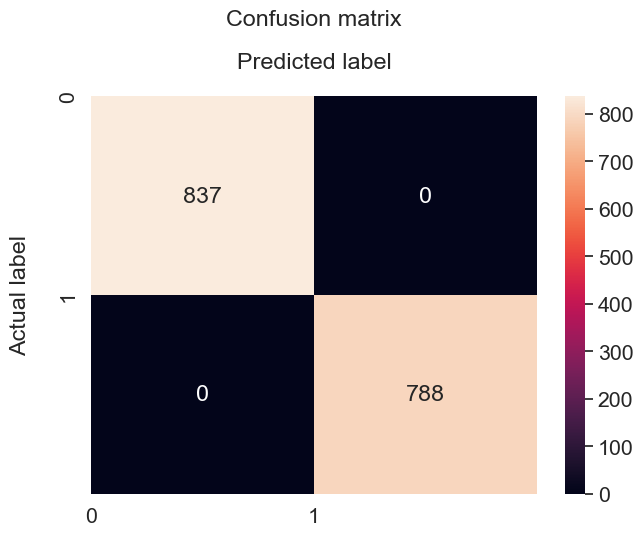

In [ ]:
import seaborn as sn
import numpy as np
# 模糊矩陣
cm = confusion_matrix(y_test, y_test_pred_rf) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix(random forest)\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### 以此觀查到['veil-type']對於模型預測沒有意義，可以drop掉 看模型效果會不會比較好(但目前分數都是1不尋常)

## SVM

### 3-3. SVM套膜，函數選擇("rbf") 高斯核

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn import metrics


model_svm = SVC(kernel='rbf') 
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
print(f"準確率:{metrics.accuracy_score(y_test, y_test_pred_svm)}")

c:\Users\Wilson\anaconda3\envs\machine_learning_final2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


準確率:0.9901538461538462


### 3-3-1. 使用訓練完隻模型 查看是否可食用

In [17]:
import numpy as np
to_be_predict = np.array([[4,1,7,0,2,1,1,0,2,1,2,2,0,7,7,0,1,1,0,2,2,1]])
predict_class = model_svm.predict(to_be_predict)
print(f"預測結果{predict_class}/1=poisonous, 0=edible")

預測結果[0]/1=poisonous, 0=edible


Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

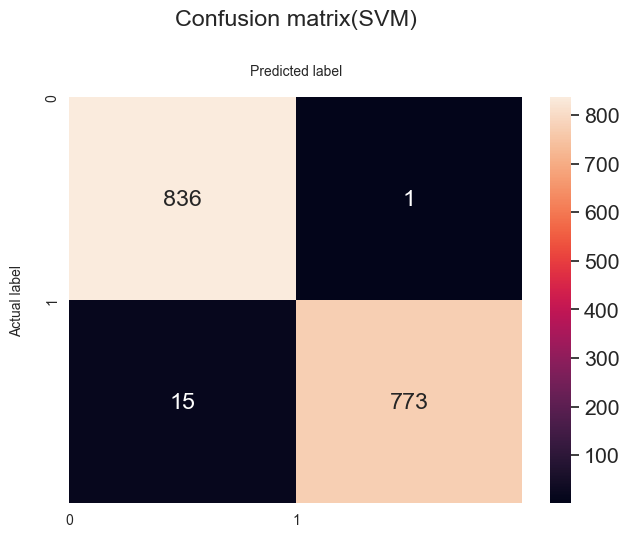

In [18]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
# 模糊矩陣
cm = confusion_matrix(y_test, y_test_pred_svm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix(SVM)\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### 3-4. SVM 對特徵做手動篩選，看準確率會不會上升
手動篩選依據 random forest 對特徵的重要性排名

In [19]:
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn import metrics


X_train = pd.DataFrame(X_train, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']) 
X_test = pd.DataFrame(X_test, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']) 

# drop 掉特徵篩選的看能不能提高準確率
drop_X_train = X_train.drop(['gill-attachment','veil-type'],axis=1)
drop_X_test = X_test.drop(['gill-attachment','veil-type'],axis=1)

# 删除包含 NaN 值的行
drop_X_train.dropna(inplace=True)
drop_X_test.dropna(inplace=True)

print(drop_X_train.shape)
print(drop_X_test.shape)


model_svm_drop_v1 = SVC(kernel='rbf') 
model_svm_drop_v1.fit(drop_X_train,y_train)
y_test_pred_svm_drop = model_svm_drop_v1.predict(drop_X_test)
print(f"準確率droping version:{metrics.accuracy_score(y_test, y_test_pred_svm_drop)}")


(6499, 20)
(1625, 20)


c:\Users\Wilson\anaconda3\envs\machine_learning_final2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


準確率droping version:0.9907692307692307


#### 結論
drop掉準確率有微微上升但影響不大因為已經非常準確，所以無須為了0.00幾的準確率而大幅修改

## 高斯貝式分類器

### 3-5. 套膜

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# 初始化貝式分類器
classifier = GaussianNB()
# 將訓練數據擬合到分類器上
classifier.fit(X_train, y_train)

# 使用擬合好的分類器進行預測
y_pred_Gaussian = classifier.predict(X_test)
# 計算預測準確率
accuracy = accuracy_score(y_test, y_pred_Gaussian)
print("Accuracy:", accuracy)

Accuracy: 0.9273846153846154


c:\Users\Wilson\anaconda3\envs\machine_learning_final2\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3-6. 模糊矩陣&四大指標

accutacy score : 0.9273846153846154
f1_score : 0.9254108723135271
precision_score : 0.9219143576826196
recall_score : 0.9289340101522843


<Figure size 2800x2000 with 0 Axes>

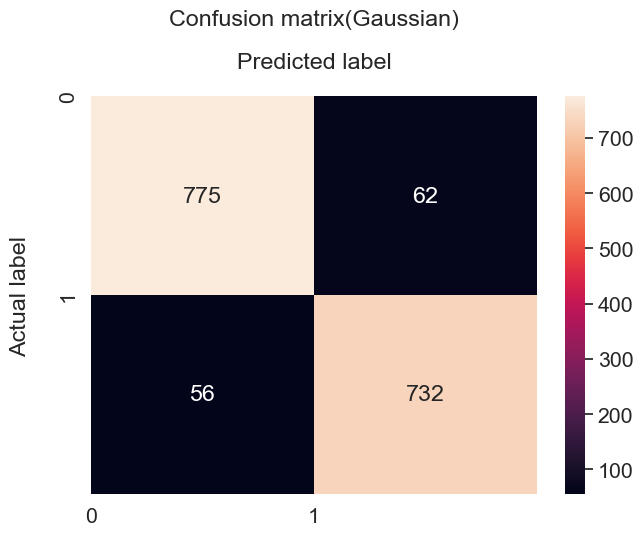

In [11]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn import metrics

# 模糊矩陣
cm = confusion_matrix(y_test, y_pred_Gaussian) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix(Gaussian)\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

print(f"accutacy score : {metrics.accuracy_score(y_test, y_pred_Gaussian)}")
print(f"f1_score : {metrics.f1_score(y_test, y_pred_Gaussian)}")
print(f"precision_score : {metrics.precision_score(y_test, y_pred_Gaussian)}")
print(f"recall_score : {metrics.recall_score(y_test, y_pred_Gaussian)}")
